In [1]:
from step import preprocessing as pp
from step import stats as st
from step import msn

import gpxpy
import pandas as pnd
import numpy as np
from datetime import timedelta
from tabulate import tabulate

from scipy import stats

from sklearn import preprocessing

from math import cos, radians

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib notebook
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['ytick.labelsize'] = 'medium'
matplotlib.rcParams['xtick.labelsize'] = 'medium'
matplotlib.rcParams['legend.fancybox'] = True
matplotlib.rcParams['figure.figsize'] = (9, 6)
sns.set_style('ticks', {"axes.xmargin": 0.2, "axes.ymargin": 0.2});

In [13]:
_1 = r'C:\DATA\MapMyRun\Grenoble\40890583\16_16_Run _ Jog\950590555.gpx'
_2 = r'C:\DATA\MapMyRun\Grenoble\37695677\16_16_Run _ Jog\1007756961.gpx'
_3 = r'C:\DATA\MapMyRun\Grenoble\49996348\16_16_Run _ Jog\1079694145.gpx'
_4 = r'C:\DATA\MapMyRun\Grenoble\27031614\16_283_Easy _ General\1223879101.gpx'
_7 = r'C:\DATA\MapMyRun\Grenoble\27031614\16_16_Run _ Jog\728010151.gpx'
_25 = r'C:\DATA\MapMyRun\Barcelona\54155702\16_103_Sprints\835097087.gpx'
_14 = r'C:\DATA\MapMyRun\Barcelona\54594328\16_16_Run _ Jog\1001316367.gpx'
_31 = r'C:\DATA\MapMyRun\Barcelona\40597477\16_16_Run _ Jog\1100430165.gpx'
_32 = r'C:\DATA\MapMyRun\Grenoble\38534723\16_16_Run _ Jog\998898403.gpx'
_33 = r'C:\DATA\MapMyRun\Grenoble\27031614\11_637_Commute\1583713025.gpx'
_34 = r'C:\DATA\MapMyRun\Grenoble\27031614\16_16_Run _ Jog\1416690011.gpx'
_36 = r'C:\DATA\MapMyRun\Grenoble\9909216\16_16_Run _ Jog\709085461.gpx'
_37 = r'C:\DATA\MapMyRun\Grenoble\40890583\16_16_Run _ Jog\1145927101.gpx'

_40 = r'C:\DATA\MapMyRun\Chicago\22732467\16_16_Run _ Jog\1086077661.gpx' #no distance outlier, sequence of 'stops'
_41 = r'C:\DATA\MapMyRun\Chicago\35494281\16_16_Run _ Jog\995057635.gpx' #no outliers


In [14]:
gpx = gpxpy.parse(open(_41, 'r'))
#Ignore first 30 seconds (to avoid GPS "time to first fix")
gpx = pp.discard(gpx, timedelta(seconds=30))

movement_attributes = pp.get_movement_attributes(gpx)
df_all = pnd.DataFrame(movement_attributes, index=movement_attributes['timestamp'])

df = df_all[1:]

i_series = pnd.Series(np.arange(len(df)), index=df.index).rename('idx')
df = pnd.concat([df, i_series], axis=1)

df.head()

,acceleration,angle,distance,elevation,heading,latitude,longitude,speed,time,timestamp,idx
2015-05-21 23:10:08,-0.037878,178.449234,10.328339,157,0,41.912598,-87.679906,3.442780,3,2015-05-21 23:10:08,0
2015-05-21 23:10:12,-0.120316,172.420695,13.165064,154,2,41.912714,-87.679900,3.291266,4,2015-05-21 23:10:12,1
2015-05-21 23:10:16,-0.030698,178.310279,11.240010,154,9,41.912813,-87.679878,2.810002,4,2015-05-21 23:10:16,2
2015-05-21 23:10:20,-0.038716,172.388116,10.748836,156,8,41.912907,-87.679861,2.687209,4,2015-05-21 23:10:20,3
2015-05-21 23:10:25,0.038624,176.836582,12.468138,157,0,41.913019,-87.679860,2.493628,5,2015-05-21 23:10:25,4


<IPython.core.display.Javascript object>


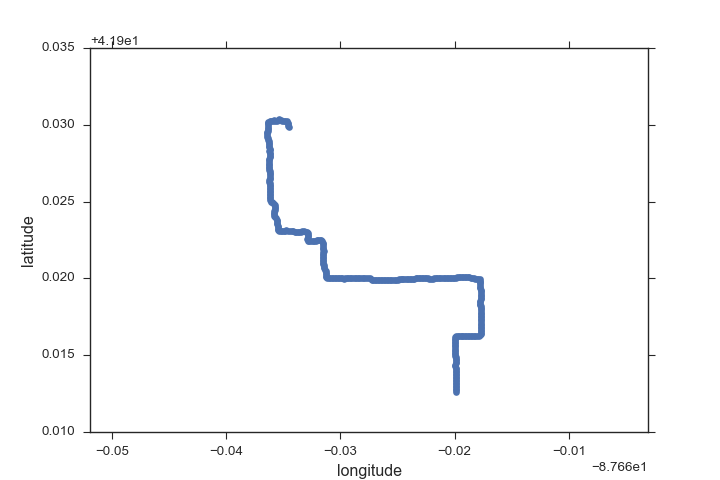

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

xx = df.longitude
yy = df.latitude

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.plot(df.longitude, df.latitude, 'o:', ms=6)

central_latitude = sum(plt.axes().get_ylim())/2.
mercator_aspect_ratio = 1/cos(radians(central_latitude))
plt.axes().set_aspect(mercator_aspect_ratio, adjustable='datalim')

In [18]:
moves, stops, noise = msn.get_move_stop_noise(df)

In [19]:
moves

[[0, 162], [164, 267], [269, 341]]

In [20]:
stops

[[163, 163], [268, 268]]

In [21]:
stops_i = np.array([])
for interval in stops:
    stops_i = np.append(stops_i, np.linspace(interval[0], interval[1], interval[1]-interval[0]+1))

stops_i = np.array(stops_i, dtype=int)

df.iloc[stops_i]

,acceleration,angle,distance,elevation,heading,latitude,longitude,speed,time,timestamp,idx
2015-05-21 23:24:10,0.690854,140.872512,10.921384,161,305,41.920023,-87.687446,0.376600,29,2015-05-21 23:24:10,163
2015-05-21 23:33:18,0.641129,162.801556,11.051297,151,314,41.924832,-87.695806,0.650077,17,2015-05-21 23:33:18,268


In [22]:
noise

[]

In [23]:
noise_i = np.array([])
for interval in noise:
    noise_i = np.append(noise_i, np.linspace(interval[0], interval[1], interval[1]-interval[0]+1))

noise_i = np.array(noise_i, dtype=int)
df.iloc[noise_i]

,acceleration,angle,distance,elevation,heading,latitude,longitude,speed,time,timestamp,idx


<IPython.core.display.Javascript object>


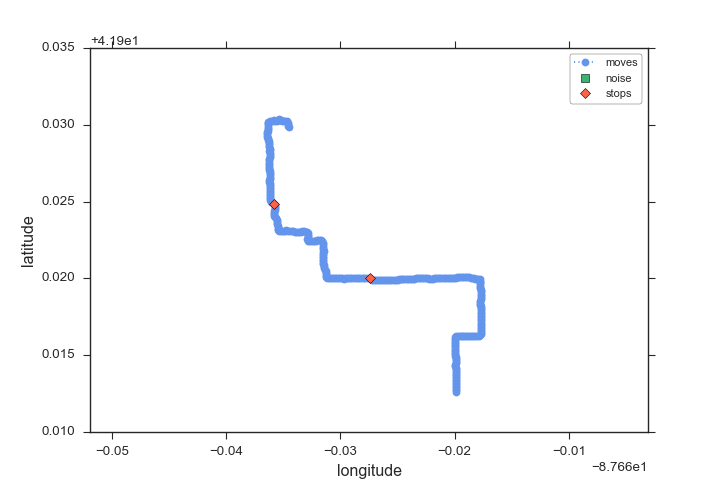

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

xx = df.longitude
yy = df.latitude

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.plot(df.longitude, df.latitude, 'o:', label='moves', color='cornflowerblue', ms=7, alpha=1)

xx_noise = df.iloc[noise_i]['longitude']
yy_noise = df.iloc[noise_i]['latitude']
plt.plot(xx_noise, yy_noise, 's', label='noise', color='mediumseagreen', ms=7, alpha=1, mew=.5)

xx_stops = df.iloc[stops_i]['longitude']
yy_stops = df.iloc[stops_i]['latitude']
plt.plot(xx_stops, yy_stops, 'D', label='stops', color='tomato', ms=7, alpha=1, mew=.5)

plt.legend(loc='best', frameon=True)

central_latitude = sum(plt.axes().get_ylim())/2.
mercator_aspect_ratio = 1/cos(radians(central_latitude))
plt.axes().set_aspect(mercator_aspect_ratio, adjustable='datalim')